# Customer Churn Prediction

## Content

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Saving
10. Model Inference
11. Conclusion

##  1. Introduction 

#### Name : Abdurrahman Shiddiq Thaha

### 1.1 Background

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs

### 1.2 Problem Statement

Create an Artificial Neural Network model to predict behavior to retain customers with the provided dataset.

## 2. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- tensorflow : Used to do Neural Network procedure

- pickle : used to create .pkl file for deployment

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
import tensorflow as tf
from tensorflow import keras
import pickle
import scipy.stats as st
import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline


sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

# set the random seed
np.random.seed(420)
tf.random.set_seed(420)

## 3. Data Loading 

We have been provided with 1 dataset . The description for what the dataset contain is given below: 


- **Telco-Customer-Churn.csv** : A dataset which contains Service that each customer has signed up for, customer account information and customer's demographic

The details of the dataset can be seen here [Here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### • Data Description

| Variable | Definition | Description |
| --- | --- | --- |
| customerID | Customer ID | |
| gender | Whether the customer is a male or a female  |  |
| SeniorCitizen | Whether the customer is a senior citizen or not  | (1, 0) |
| Partner | Whether the customer has a partner or not  | Yes, No |
| Dependents | Whether the customer has dependents or not  | Yes, No |
| tenure | Number of months the customer has stayed with the company  |  |
| PhoneService | Whether the customer has a phone service or not  | Yes, No |
| MultipleLines | Whether the customer has multiple lines or not  | Yes, No, No phone service |
| InternetService | Customer’s internet service provider  | DSL, Fiber optic, No |
| OnlineSecurity | Whether the customer has online security or not  | Yes, No, No internet service |
| OnlineBackup | Whether the customer has online backup or not  | Yes, No, No internet service |
| DeviceProtection | Whether the customer has device protection or not  | Yes, No, No internet service |
| TechSupport | Whether the customer has tech support or not  | Yes, No, No internet service |
| StreamingTV | Whether the customer has streaming TV or not  | Yes, No, No internet service |
| StreamingMovies | Whether the customer has streaming movies or not  | Yes, No, No internet service |
| Contract | The contract term of the customer  | Month-to-month, One year, Two year |
| PaperlessBilling | Whether the customer has paperless billing or no  | Yes, No |
| PaymentMethod | The customer’s payment method  | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic) |
| MonthlyCharges | The amount charged to the customer monthly  |  |
| TotalCharges | The total amount charged to the customer  |  |
| Churn | Whether the customer churned or not  | Yes or No |

In [2]:
# Loading data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Duplicate Dataset
df_copy = df.copy()

In [4]:
# Checking the shape of the dataset
df.shape

(7043, 21)

This dataset has 7043 rows and 21 columns (1 Target and 20 features)

In [5]:
# Look at the first 3 rows
df_copy.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
# Look at the last 3 rows
df_copy.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Show concise summary of the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- there is no column that has null values
- there are 18 columns with object datatype, 1 column with float64 datatype and 2 columns with int64 datatype

### • Convert not NaN missing value to NaN

In [8]:
df_copy['TotalCharges'].replace({' ': np.nan}, inplace=True)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### • Encoding the target

In [9]:
df_copy['Churn'] = np.where(df_copy['Churn'] == 'Yes', 1, 0)

In [10]:
df_copy['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### • Changing Datatype

TotalCharges: object -> float64


In [11]:
df_copy['TotalCharges'] = df_copy['TotalCharges'].astype('float64')

In [12]:
df_copy['TotalCharges'].dtypes

dtype('float64')

### • Checking for duplicate

In [13]:
# Checking if the dataset have duplicate
df_copy.shape[0] - df_copy.drop_duplicates().shape[0]

0

There is not duplicate data

### • Splitting data train, data validation and data test

Splitting data into data train and test with a ratio of 80/20

In [14]:
# split train and test data
train, test = train_test_split(df_copy, test_size=0.2)

In [15]:
train, val = train_test_split(train, test_size=0.2)

In [16]:
train.reset_index(inplace=True, drop=True)
train.shape

(4507, 21)

In our data train we have 4507 rows and 21 columns (1 Target and 20 features)

In [17]:
val.reset_index(inplace=True, drop=True)
val.shape

(1127, 21)

In our data validation we have 1127 rows and 21 columns (1 Target and 20 features)

In [18]:
test.reset_index(inplace=True, drop=True)
test.shape

(1409, 21)

In our data train we have 1409 rows and 21 columns (1 Target and 20 features)

In [19]:
# Generate some descriptive statistics of numerical data
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,4507.000000,4507.000000,4507.000000,4502.000000,4507.000000
mean,0.158864,32.502552,64.434424,2285.826833,0.269581
std,0.365590,24.491820,30.221607,2263.549427,0.443791
min,0.000000,0.000000,18.700000,18.800000,0.000000
25%,0.000000,9.000000,34.825000,399.700000,0.000000
50%,0.000000,29.000000,70.200000,1399.275000,0.000000
75%,0.000000,55.000000,89.850000,3778.150000,1.000000
max,1.000000,72.000000,118.650000,8564.750000,1.000000


We can see above, it seems there in no anomaly at all.

## 4. Exploratory Data Analysis (EDA)

There are 3 datatypes in the dataset:

1. Target: `Churn`

2. Numerical: `tenure`, `MonthlyCharges`, `TotalCharges`

3. Categorical: `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`


For each datatype, we will do different data exploration

### • Target

In [117]:
# define a function to visualize target distribution
def target_dist(df, target):
    plt.figure(figsize=(7,5))

    _ = sns.countplot(x=df[target])
    _.bar_label(_.containers[0]);
    _.set_yticks([])
    _.set_ylabel('')
    _.set_xlabel('')
    
    pct_0 = df[target].value_counts()[0]*100 / df.shape[0]

    _.set_xticklabels([f'0 ({pct_0:.2f}%)', f'1 ({100-pct_0:.2f}%)']);
    _.set_title(f'Target Distribution')
    _.grid(False)
    sns.despine(bottom = True, left = True)

    plt.tight_layout;

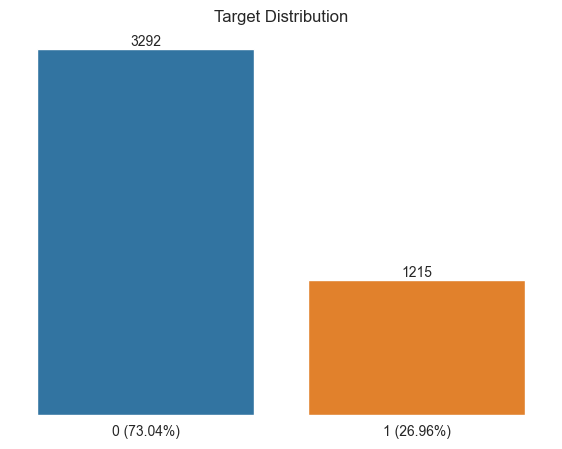

In [118]:
target_dist(train, 'Churn')



as the figure showed, the proportion of label in our target is rather imbalance. We only have **1215** data that is considered label `1` or Churn which makes it minority class compared to **3292** of data which is considered as label `0` or not churn which we call as majority class. with that proportion, this circumstance is fall under the category of **mild imbalance** that later we will handle

### • Numerical

For numerical data type, we will see the distribution of each column and correlation among each column plus the target


Numerical: `tenure`, `MonthlyCharges`, `TotalCharges`

In [22]:
# defining a function to plot the distribution of data
def plot_numerical(df, feature, length=16, width=14):
    fig, axes = plt.subplots(len(feature), 2, figsize=(length, width))
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins='auto')
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c}''')
        sns.despine()
        
    plt.tight_layout()
    
# defining a function to plot the correlation of features and target
def plot_heatmap(df, feature, target):
    plt.figure(figsize=(10,6))
    
    _ = sns.heatmap(df[feature + [target]].corr(), annot=True, annot_kws={"fontsize":13});
    _.set_title(f'Correlation heatmap')

In [23]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

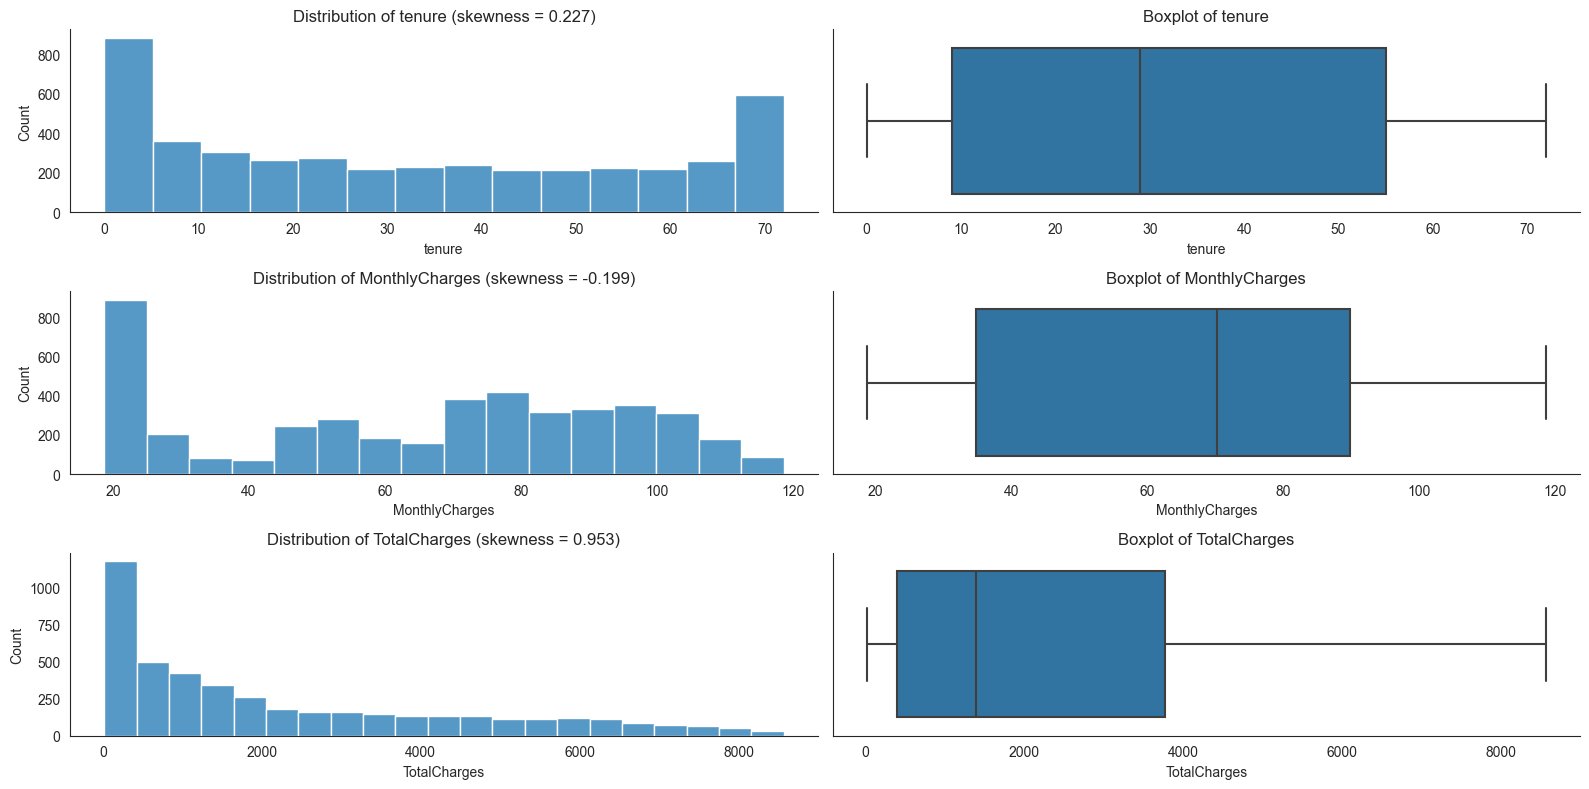

In [24]:
plot_numerical(train, num_col, width=8)

From the visualization above, it seems that only `MonthlyCharges` is the only feature that has a somewhat normal distribution, on the other hand, `TotalCharges` is right skewed and `tenure` is uniform-ish distributed.

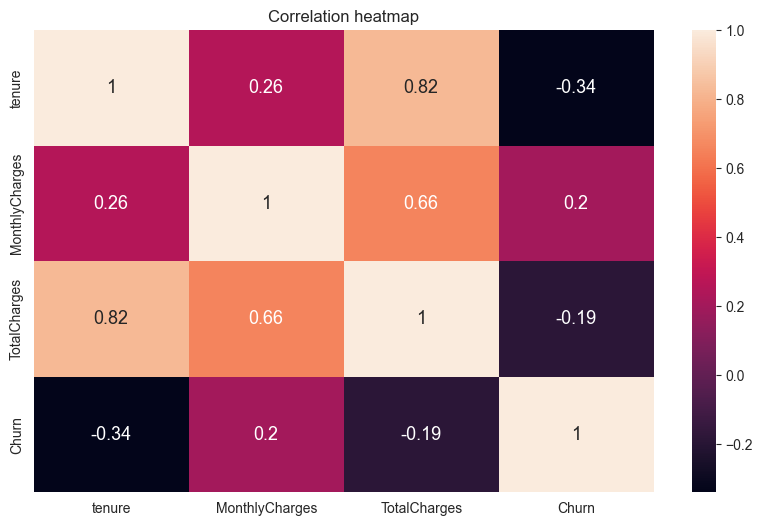

In [25]:
plot_heatmap(train, num_col, 'Churn')

Apparently, The correlations between the numerical features and the target are quite significant with at least 0.19. But one more thing that need to be pointed out is the correlation between `TotalCharges` and `tenure` is really huge.

### • Categorical

Categorical Columns: `Marathon`, `Name`, `Category`, `CrossTraining`, `CATEGORY`

We will not use `Marathon` and `Name` since both of that data doesn't give any useful information. Also we will leave out `CATEGORY` since it is derived from the marathon time which will do a data leak.

In [26]:
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [27]:
# create a function to only show the label when it's > 5%
def autopct(pct): 
    return ('%1.1f%%' % pct) if pct > 5 else ''

# defining a function to plot a pie chart
def cat_chart(df, feature):
    fig, axes = plt.subplots(len(feature), 2, figsize=(16,14))

    
    # Use for loop to plot all of the categorical data into pie chart
    for c, ax in zip(feature, axes):
        n_cat = df[c].nunique()


        _ = df[c].value_counts().sort_values(ascending=False).plot(kind='pie', fontsize=10, autopct=autopct, ax=ax[0], title=f'{c} ({n_cat} categories)');
        _ = ax[0].set_ylabel('')


        _ = sns.countplot(x=df[c], hue=df['target'], ax=ax[1], palette=['green', 'red'])
        _.bar_label(_.containers[0])
        _.bar_label(_.containers[1])
        _.set_title(f'Target Distribution in {c}')
        _.grid(False)
        sns.despine()

        plt.tight_layout()

In [34]:
# define a function to only show the label when it's > 5%
def autopct(pct): 
    return ('%1.1f%%' % pct) if pct > 5 else ''

# defining a function to plot a pie chart
def cat_chart(df, feature, target='target', length=16, width=14):
    fig, axes = plt.subplots(len(feature), 2, figsize=(length,width))

    
    # Use for loop to plot all of the categorical data into pie chart
    for c, ax in zip(feature, axes):
        n_cat = df[c].nunique()


        _ = df[c].value_counts().sort_values(ascending=False).plot(kind='pie', fontsize=10, autopct=autopct, ax=ax[0], title=f'{c} ({n_cat} categories)');
        _ = ax[0]


        _ = sns.countplot(x=df[c], hue=df[target], ax=ax[1], palette=['green', 'red'])
        _.bar_label(_.containers[0])
        _.bar_label(_.containers[1])
        _.set_title(f'Target Distribution in {c}')
        _.grid(False)
        sns.despine()

        plt.tight_layout()

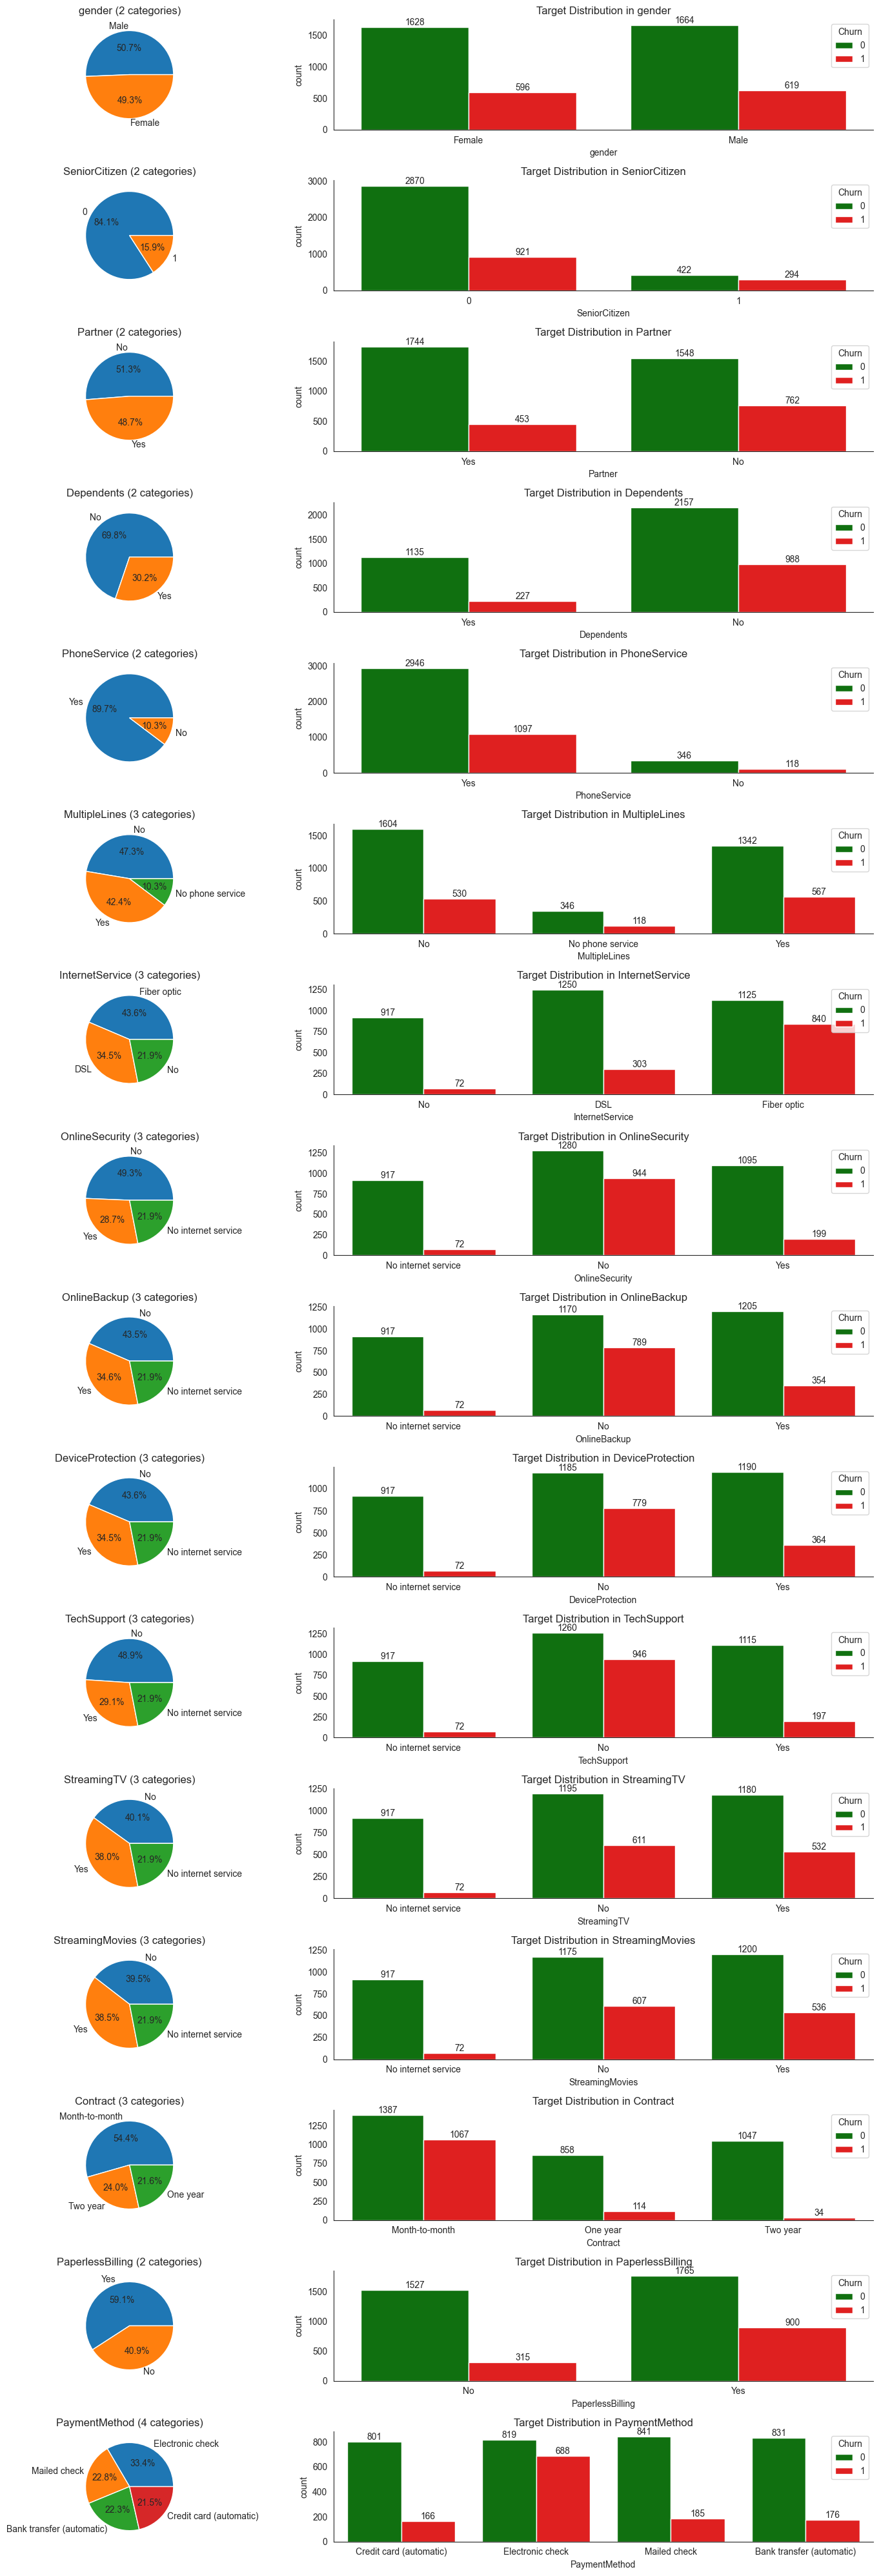

In [36]:
cat_chart(train, cat_col, 'Churn', width=40)

As can be seen above, there are 6 features with a binary value, 9 features with 3 possible categories, 1 feature with 4 possible. In addition of that we can also notice there are a columns that have a imbalanced data which are `SeniorCitizen`, `Dependents`, and `PhoneService`.

In order to find correlation between the categorical features and our target which is binary, we will use chi-square test.

In [30]:
def chi_square(df, col, target):
    selected_cat_col = []
    for c in col:
        # create a contingency table
        contingency_table = pd.crosstab(train[c], train[target])
        
        # input contingency table to perform the test
        stat, p, dof, expected = st.chi2_contingency(contingency_table)
        print(f'\n{c} and target')
        print('p=%.3f' % (p))
        if p > 0.05:
            print(f'Probably independent')
        else:
            print(f'Probably dependent')
            selected_cat_col.append(c)
    return selected_cat_col

In [31]:
sel_cat_col = chi_square(train, cat_col, 'Churn')


gender and target
p=0.838
Probably independent

SeniorCitizen and target
p=0.000
Probably dependent

Partner and target
p=0.000
Probably dependent

Dependents and target
p=0.000
Probably dependent

PhoneService and target
p=0.467
Probably independent

MultipleLines and target
p=0.002
Probably dependent

InternetService and target
p=0.000
Probably dependent

OnlineSecurity and target
p=0.000
Probably dependent

OnlineBackup and target
p=0.000
Probably dependent

DeviceProtection and target
p=0.000
Probably dependent

TechSupport and target
p=0.000
Probably dependent

StreamingTV and target
p=0.000
Probably dependent

StreamingMovies and target
p=0.000
Probably dependent

Contract and target
p=0.000
Probably dependent

PaperlessBilling and target
p=0.000
Probably dependent

PaymentMethod and target
p=0.000
Probably dependent


From the test result above, All of the categorical features are significantly correlated with our target except `Gender` and `PhoneService`

### • Feature Selection

Based in the Exploratory Data Analysis that we have done, we consider to include these feature(s) for our model:

- `tenure`, `MonthlyCharges` and `TotalCharges` : Have a relatively significant correlation with the target
- `SeniorCitizen`, `Partner`, `Dependents`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`,  : Have relatively significant correlation based on chi-square test.

In [32]:
feature_num = ['tenure', 'MonthlyCharges', 'TotalCharges']
feature_cat_bin = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']
feature_cat_nom = list(set(sel_cat_col) - set(feature_cat_bin))
target = ['Churn']

In [33]:
# select feature for train and test data
train_selected = train[feature_num + feature_cat_bin + feature_cat_nom + target]
val_selected = val[feature_num + feature_cat_bin + feature_cat_nom + target]
test_selected = test[feature_num + feature_cat_bin + feature_cat_nom + target]
train_selected.head(3)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,StreamingTV,PaymentMethod,OnlineSecurity,Contract,TechSupport,DeviceProtection,MultipleLines,OnlineBackup,StreamingMovies,InternetService,Churn
0,55,20.00,1087.25,0,Yes,Yes,No,No internet service,Credit card (automatic),No internet service,Month-to-month,No internet service,No internet service,No,No internet service,No internet service,No,0
1,2,25.05,56.35,0,No,No,Yes,No,Electronic check,No,Month-to-month,No,No,No phone service,No,No,DSL,1
2,3,19.45,69.25,0,No,No,Yes,No internet service,Mailed check,No internet service,One year,No internet service,No internet service,No,No internet service,No internet service,No,0


In [34]:
print('Train Size : ', train_selected.shape)
print('Validation Size : ', val_selected.shape)
print('Test Size  : ', test_selected.shape)

Train Size :  (4507, 18)
Validation Size :  (1127, 18)
Test Size  :  (1409, 18)


## 5. Data Preprocessing

### • Data for model inference

In [35]:
# Get Data for Model Inference
df_inf = train_selected.sample(10)
df_inf.head(3)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,StreamingTV,PaymentMethod,OnlineSecurity,Contract,TechSupport,DeviceProtection,MultipleLines,OnlineBackup,StreamingMovies,InternetService,Churn
2170,72,99.15,7422.10,0,Yes,No,Yes,No,Electronic check,Yes,Two year,No,Yes,Yes,Yes,Yes,Fiber optic,0
3390,66,89.90,5958.85,0,Yes,Yes,No,Yes,Credit card (automatic),Yes,Two year,Yes,Yes,Yes,Yes,Yes,DSL,0
4037,45,62.55,2796.45,0,No,No,Yes,No,Credit card (automatic),Yes,One year,Yes,No,No,Yes,No,DSL,0


In [36]:
# Remove Inference-Set from Dataset
train_selected = train_selected.drop(df_inf.index)
train_selected.shape

(4497, 18)

In [37]:
# Reset Index 
train_selected.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

### • Handling outliers

In [38]:
# Defining a function to analyze outlier in the data

def outlier_analysis(df, col):
    skewness = df[col].skew()
    if skewness >= 0.5 and skewness<=0.5:
        upper = df[col].mean() + 3*df[col].std()
        lower = df[col].mean() - 3*df[col].std()
        method = 'Z-Score'
    else:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 3)
        lower_bound = q1 - (iqr * 3)
        method = 'IQR'

    outlier = df.loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    return outlier, method, upper_bound, lower_bound

In [39]:
# using for loop to go through every numerical column and handle their outliers
for col in feature_num:
    out, method, up, low = outlier_analysis(train_selected, col)
    pct_out = (len(out)/len(train))*100
    
    # if outliers percentage is under 10%, we will drop the data
    if pct_out <= 10:
        train_selected = train_selected[(train_selected[col]>=low) & (train_selected[col]<=up)]
    # if outliers percentage is over 10%, we will cap the outliers 
    else:
        train_selected[col] = train_selected[col].apply(lambda x: up if x>=up else low if x<=low else x)

In [40]:
train_selected.shape

(4492, 18)

After outliers handling, we are left with 4492 rows and 18 columns

### • Handling missing values

In [41]:
def mis_val_identifier(df):
    temp = df.isnull().sum()/df.shape[0]
    return temp.loc[temp != 0]

In [42]:
# Finding missing values in train
mis_val_identifier(train_selected)

Series([], dtype: float64)

There is no missing values in data train

In [43]:
# Finding missing values in test
mis_val_identifier(val_selected)

TotalCharges    0.001775
dtype: float64

In [44]:
mis_val_identifier(test_selected)

TotalCharges    0.002839
dtype: float64

Both in data validation and test, we have a few missing values which we will handle by dropping them.

In [45]:
# Dropping data with NaN values
val_selected.dropna(inplace=True)
test_selected.dropna(inplace=True)

In [46]:
# Finding missing values
mis_val_identifier(val_selected)

Series([], dtype: float64)

In [47]:
# Finding missing values
mis_val_identifier(test_selected)

Series([], dtype: float64)

There is no more missing values anymore

### • Splitting between `X` (Features) and `y` (Target)

In [48]:
# Split between Train-Set and Test-Set

X_train = train_selected[feature_num + feature_cat_bin + feature_cat_nom]
X_val = val_selected[feature_num + feature_cat_bin + feature_cat_nom]
X_test = test_selected[feature_num + feature_cat_bin + feature_cat_nom]

y_train = train_selected[target]
y_val = val_selected[target]
y_test = test_selected[target]

print('Train Size : ', X_train.shape)
print('Train Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4492, 17)
Train Size :  (1125, 17)
Test Size  :  (1405, 17)


### • Splitting Numerical Columns and Categorical Columns

In [49]:
# Split between numerical and categorical features

X_train_num = X_train[feature_num]
X_train_cat_bin = X_train[feature_cat_bin]
X_train_cat_nom = X_train[feature_cat_nom]

X_val_num = X_val[feature_num]
X_val_cat_bin = X_val[feature_cat_bin]
X_val_cat_nom = X_val[feature_cat_nom]

X_test_num = X_test[feature_num]
X_test_cat_bin = X_test[feature_cat_bin]
X_test_cat_nom = X_test[feature_cat_nom]


### • Feature encoding

In [50]:
# using ordinal encoder to encode the binary categorical data

encoder_lab = OrdinalEncoder().fit(X_train_cat_bin)

X_train_encoded_bin = pd.DataFrame(encoder_lab.transform(X_train_cat_bin))
X_val_encoded_bin = pd.DataFrame(encoder_lab.transform(X_val_cat_bin))
X_test_encoded_bin = pd.DataFrame(encoder_lab.transform(X_test_cat_bin))
X_train_encoded_bin

,0,1,2,3
0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
4487,0.0,0.0,1.0,0.0
4488,0.0,1.0,1.0,1.0
4489,0.0,1.0,0.0,1.0
4490,1.0,1.0,0.0,1.0


In [51]:
# using one hot encoder to encode the nominal categorical data

encoder_ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train_cat_nom)


X_train_encoded_nom = pd.DataFrame(encoder_ohe.transform(X_train_cat_nom).toarray())
X_val_encoded_nom = pd.DataFrame(encoder_ohe.transform(X_val_cat_nom).toarray())
X_test_encoded_nom = pd.DataFrame(encoder_ohe.transform(X_test_cat_nom).toarray())
X_train_encoded_nom

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4489,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4490,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


### • Feature scaling

In [52]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in X_train_num.columns:
    if X_train_num[col].skew() >=-0.5 and train[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
scaler

StandardScaler()

We will use Standard Scaler to do feature scaling

In [53]:
# Feature scaling using StandardScaler Scaler

X_train_scaled = scaler.fit_transform(X_train_num)
X_val_scaled = scaler.transform(X_val_num)
X_test_scaled = scaler.transform(X_test_num)

### • Concate between Numerical Columns and Categorical Columns

In [54]:
# Concate Columns

X_train_final = np.concatenate([X_train_scaled, X_train_encoded_bin, X_train_encoded_nom], axis=1)
X_val_final = np.concatenate([X_val_scaled, X_val_encoded_bin, X_val_encoded_nom], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded_bin, X_test_encoded_nom], axis=1)

In [55]:
# Create DataFrame of `X_train_final` and `X_test_final_df`

X_train_final_df = pd.DataFrame(X_train_final, columns=[feature_num+feature_cat_bin+list(range(31))])
X_val_final_df = pd.DataFrame(X_val_final, columns=[feature_num+feature_cat_bin+list(range(31))])
X_test_final_df = pd.DataFrame(X_test_final, columns=[feature_num+feature_cat_bin+list(range(31))])
X_train_final_df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.919139,-1.469701,-0.527992,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.246394,-1.302542,-0.983868,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.205535,-1.487906,-0.978163,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.327730,1.203182,1.942818,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.714843,-1.451495,-0.536660,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,-0.796944,0.066172,-0.640977,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4488,0.673984,-0.946710,-0.220766,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4489,-0.429212,0.685156,-0.180215,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4490,0.306252,1.117120,0.811708,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


### • Handling Target Imbalance

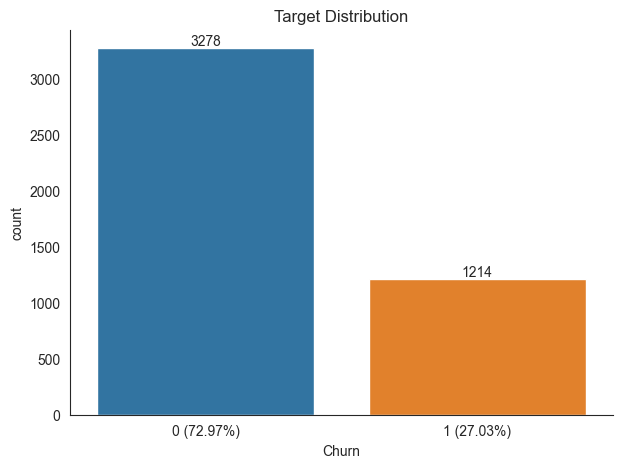

In [56]:
target_dist(y_train, 'Churn')

Based on the exploratory analysis that we have conducted, we know that our target is mildly imbalanced hence we will try to do a data imbalanced handling

In [57]:
# use SMOTENC to over sampling the data because we have categorical data in the features
smnc = SMOTENC(sampling_strategy='auto', random_state=420, categorical_features=list(range(3,38,1)))
X_train_balanced, y_train_balanced = smnc.fit_resample(X_train_final_df, y_train)

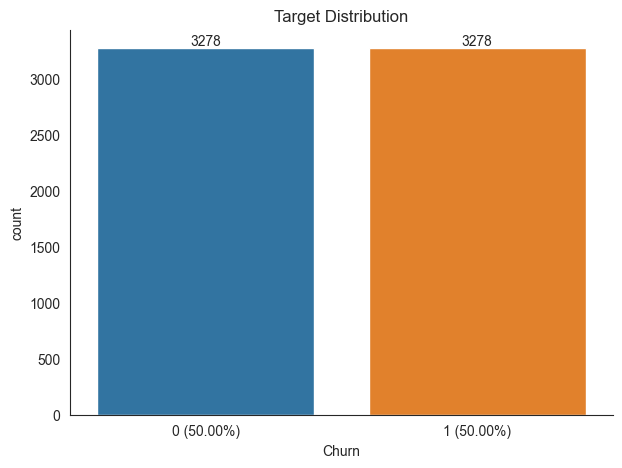

In [58]:
target_dist(y_train_balanced, 'Churn')

After being handled, we get a total of 6556 instances of data with a 50:50 proportion

### • TensorFlow Pipeline

In [59]:
## Initiate train dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_balanced))
train_dataset = train_dataset.shuffle(buffer_size=6556).batch(128)

## Initiate validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final_df, y_val))
val_dataset = val_dataset.batch(128)

## Initiate test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final_df, y_test))
test_dataset = test_dataset.batch(128)

## 6. Model Definition

We will make 2 kind of ANN: Sequential and Functional

In [60]:
# Determine the number of neuron(s) in each layer
alp = 10
inp = X_train_balanced.shape[1] 
out = 1
hid = int(len(X_train_balanced)/(alp*(inp+out)))
hid

16

### • Sequential

In [61]:
# Define sequential model's architecture

model_seq = tf.keras.models.Sequential()
        
model_seq.add(tf.keras.layers.Dense(inp, input_shape=(inp,))) # input layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu')) # hidden layer
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid')) # output layer

In [62]:
model_seq.compile(loss='binary_crossentropy',optimizer='Adam', metrics='accuracy')

In [63]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 dense_1 (Dense)             (None, 16)                624       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,123
Trainable params: 2,123
Non-trainable params: 0
_________________________________________________________________


In this model we have 3 layers with a total of 2123 parameters

### • Functional

In [64]:
# Define functional Model's Architecture

inputs = tf.keras.Input(shape=(inp,))
hidden = tf.keras.layers.Dense(inp)(inputs)
hidden = tf.keras.layers.Dense(hid, activation="relu")(hidden)
concat = tf.keras.layers.concatenate([inputs, hidden])
outputs = tf.keras.layers.Dense(out, activation="sigmoid")(concat)

model_func = tf.keras.Model(inputs=inputs, outputs=outputs)

In [65]:
model_func.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')

In [66]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 38)           1482        ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 16)           624         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 54)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In this model we have 5 layers with a total of 2161 parameters

## 7. Model Training


We will fit the model into the train data that has been preprocessed

### • Sequential

In [67]:
history_seq = model_seq.fit(train_dataset, epochs=20, validation_data=val_dataset);

Epoch 1/20
52/52 [==============================] - 1s 12ms/step - loss: 0.5499 - accuracy: 0.7158 - val_loss: 0.5058 - val_accuracy: 0.7467
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.7723 - val_loss: 0.4951 - val_accuracy: 0.7484
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.7796 - val_loss: 0.5062 - val_accuracy: 0.7396
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7826 - val_loss: 0.4562 - val_accuracy: 0.7724
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7890 - val_loss: 0.4661 - val_accuracy: 0.7671
Epoch 6/20
52/52 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.7886 - val_loss: 0.4937 - val_accuracy: 0.7458
Epoch 7/20
52/52 [==============================] - 0s 4ms/step - loss: 0.4443 - accuracy: 0.7927 - val_loss: 0.4952 - val_accuracy: 0.7440
Epoch 8/20
52/52 [=

### • Functional

In [68]:
history_func = model_func.fit(train_dataset, epochs=20, validation_data=val_dataset);

Epoch 1/20
52/52 [==============================] - 1s 7ms/step - loss: 0.7507 - accuracy: 0.5584 - val_loss: 0.5739 - val_accuracy: 0.6996
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7625 - val_loss: 0.4885 - val_accuracy: 0.7591
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4719 - accuracy: 0.7791 - val_loss: 0.4770 - val_accuracy: 0.7618
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.7793 - val_loss: 0.4789 - val_accuracy: 0.7591
Epoch 5/20
52/52 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.7831 - val_loss: 0.4752 - val_accuracy: 0.7600
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7851 - val_loss: 0.4669 - val_accuracy: 0.7644
Epoch 7/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.7880 - val_loss: 0.4938 - val_accuracy: 0.7484
Epoch 8/20
52/52 [==

## 8. Model Evaluation

In [69]:
def model_eval(history, model, ymax=0, ymin=0):
    name = (f'{model}').split('.')[3].split(' ')[0]
    fig, ax = plt.subplots(1,2, figsize=(30,10))
    fig.suptitle(f'{name} Method Evaluation', fontsize=25, weight='bold')

    plt.subplot(1,2,1)
    plt.title("Training and Validation Accuracy", fontsize=12)
    plt.plot(history.history['accuracy'],label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(linestyle='--')
    if ymax != 0:
        plt.yticks(np.arange(ymin, ymax, 0.01))

    plt.subplot(1,2,2)
    plt.title("Training and Validation Losses", fontsize=12)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.ylabel("Loss", fontsize=12)
    plt.legend()
    plt.grid(linestyle='--')

    plt.style.use('default')
    plt.show()
    
def matrix_eval(model):   
    # find the probability of each prediction
    y_test_prob = model.predict(test_dataset)

    # predict our target with test data
    y_test_pred = np.round(y_test_prob)
    
    # calculate the evaluation matrices
    fig, axes = plt.subplots(1, 1, figsize=(4, 4))

    print("="*20,"TEST","="*20)
    print(classification_report(y_test,y_test_pred,zero_division=0))
    print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))
    print("\n")
    
    _ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes, colorbar=False, cmap='Greens')
    axes.set_title('Test Confusion Matrix')
    axes.grid(False)

    plt.tight_layout()

### • Sequential

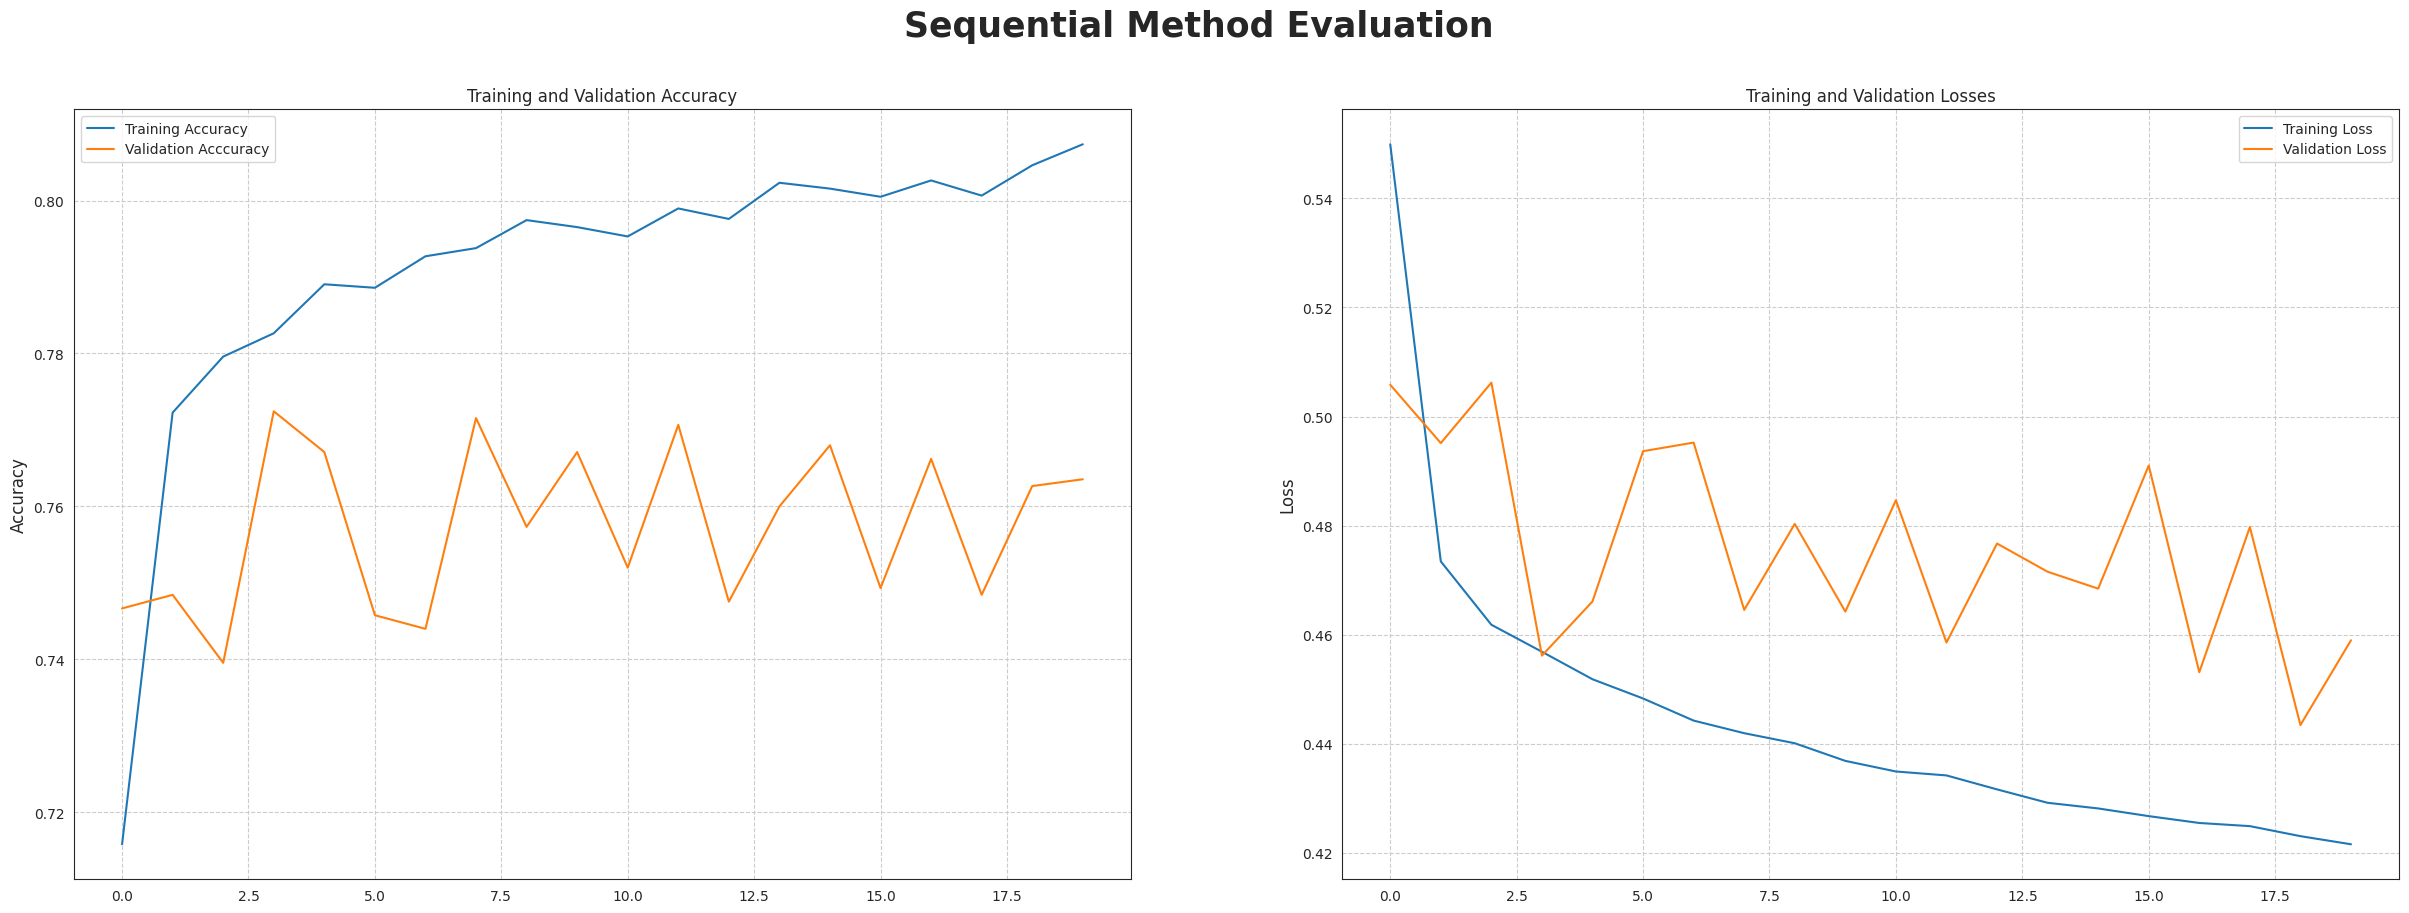

In [70]:
model_eval(history_seq, model_seq)

From the evaluation above, the result of the validation is not really good enough and it seems like it's exploding. So we can say that this model must be improved.

44/44 [==============================] - 0s 1ms/step
==================== TEST ====================
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1052
           1       0.54      0.77      0.63       353

    accuracy                           0.78      1405
   macro avg       0.72      0.77      0.74      1405
weighted avg       0.82      0.78      0.79      1405

AUC Score Test: 0.8479679875914218




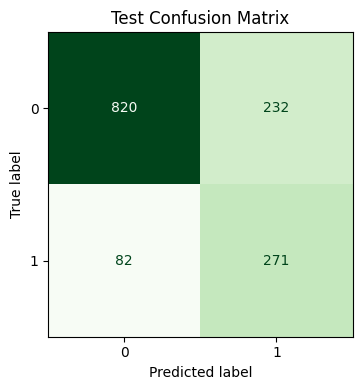

In [71]:
matrix_eval(model_seq)

First of all, the question of what kind of evaluation that we need to focus on should be answered, our basic idea of predicting churn customer is to know which customer that we should give more attention. Because of that, the appropiate evaluation matrix is recall

in this model, the recall is not very good with a value of 0.77, it is also can be seen in the confusion matrix where there are still a lot of wrong prediction on predicted as `0` but it is suppose to be `1`

### • Functional

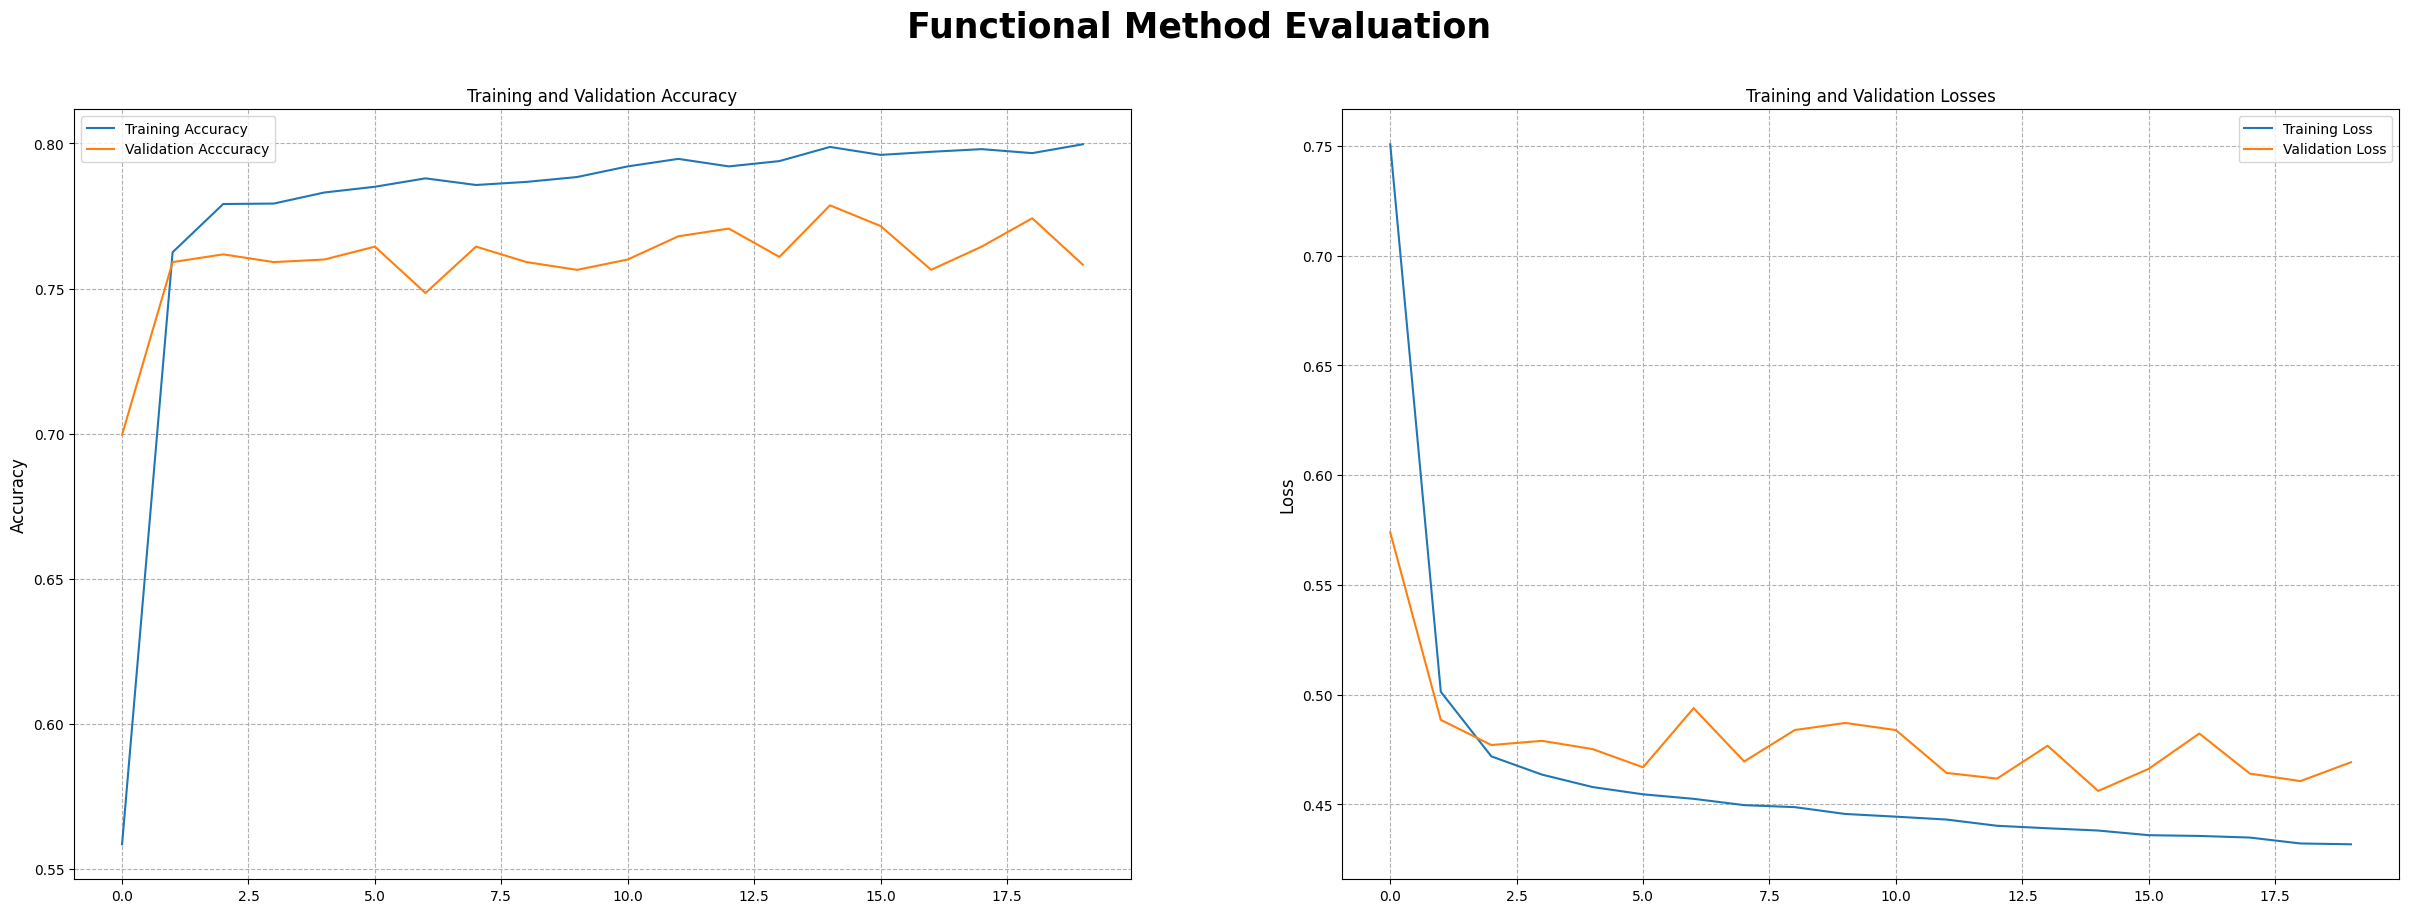

In [72]:
model_eval(history_func, model_func)

A completely different result with the previous one, this model appears to be better. Showed by how close the validation evaluation result with the training evaluation result where there the result is not as explosive as the previous one.

44/44 [==============================] - 0s 3ms/step
==================== TEST ====================
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1052
           1       0.50      0.79      0.61       353

    accuracy                           0.75      1405
   macro avg       0.71      0.76      0.71      1405
weighted avg       0.81      0.75      0.76      1405

AUC Score Test: 0.8458191061945949




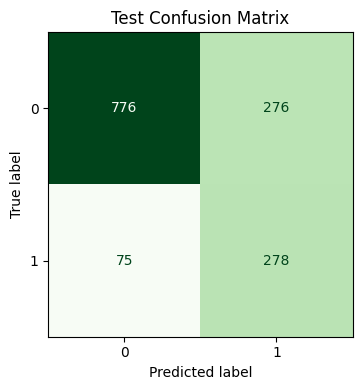

In [73]:
matrix_eval(model_func)

similar to the previous one, recall will be used to evaluate our model. in this model the recall is 0.79 which is a little bit better than the first model.

### • Model Improvement

We found out that the best model for our case in LinearRegression, hence we will do a model improvement on it by applying regularization (Ridge and Lasso)

### • Sequential

Adding activation function, weight initializer, regulizer, batch normalization, dropout and gradient clipping

In [74]:
model_seq_improved= tf.keras.models.Sequential()
model_seq_improved.add(tf.keras.layers.Dense(inp, input_shape=(inp,), activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')) # input layer
model_seq_improved.add(tf.keras.layers.BatchNormalization())
model_seq_improved.add(tf.keras.layers.Dense(hid, activation='relu')) # hidden layer
model_seq_improved.add(tf.keras.layers.BatchNormalization())
model_seq_improved.add(tf.keras.layers.Dropout(rate=0.1))
model_seq_improved.add(tf.keras.layers.Dense(hid/2, activation='relu')) # hidden layer
model_seq_improved.add(tf.keras.layers.BatchNormalization())
model_seq_improved.add(tf.keras.layers.Dropout(rate=0.1))
model_seq_improved.add(tf.keras.layers.Dense(out, activation='sigmoid')) # output layer

In [75]:
model_seq_improved.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.1), metrics='accuracy')

In [76]:
history_seq_improved = model_seq_improved.fit(train_dataset, epochs=20, validation_data=val_dataset);

Epoch 1/20
52/52 [==============================] - 3s 7ms/step - loss: 1.4049 - accuracy: 0.6428 - val_loss: 1.3306 - val_accuracy: 0.6818
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 1.1459 - accuracy: 0.7474 - val_loss: 1.1303 - val_accuracy: 0.7253
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 1.0129 - accuracy: 0.7619 - val_loss: 0.9800 - val_accuracy: 0.7538
Epoch 4/20
52/52 [==============================] - 0s 4ms/step - loss: 0.9112 - accuracy: 0.7744 - val_loss: 0.8714 - val_accuracy: 0.7707
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.8273 - accuracy: 0.7772 - val_loss: 0.7908 - val_accuracy: 0.7796
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.7874 - val_loss: 0.7223 - val_accuracy: 0.7813
Epoch 7/20
52/52 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.7833 - val_loss: 0.6754 - val_accuracy: 0.7804
Epoch 8/20
52/52 [==

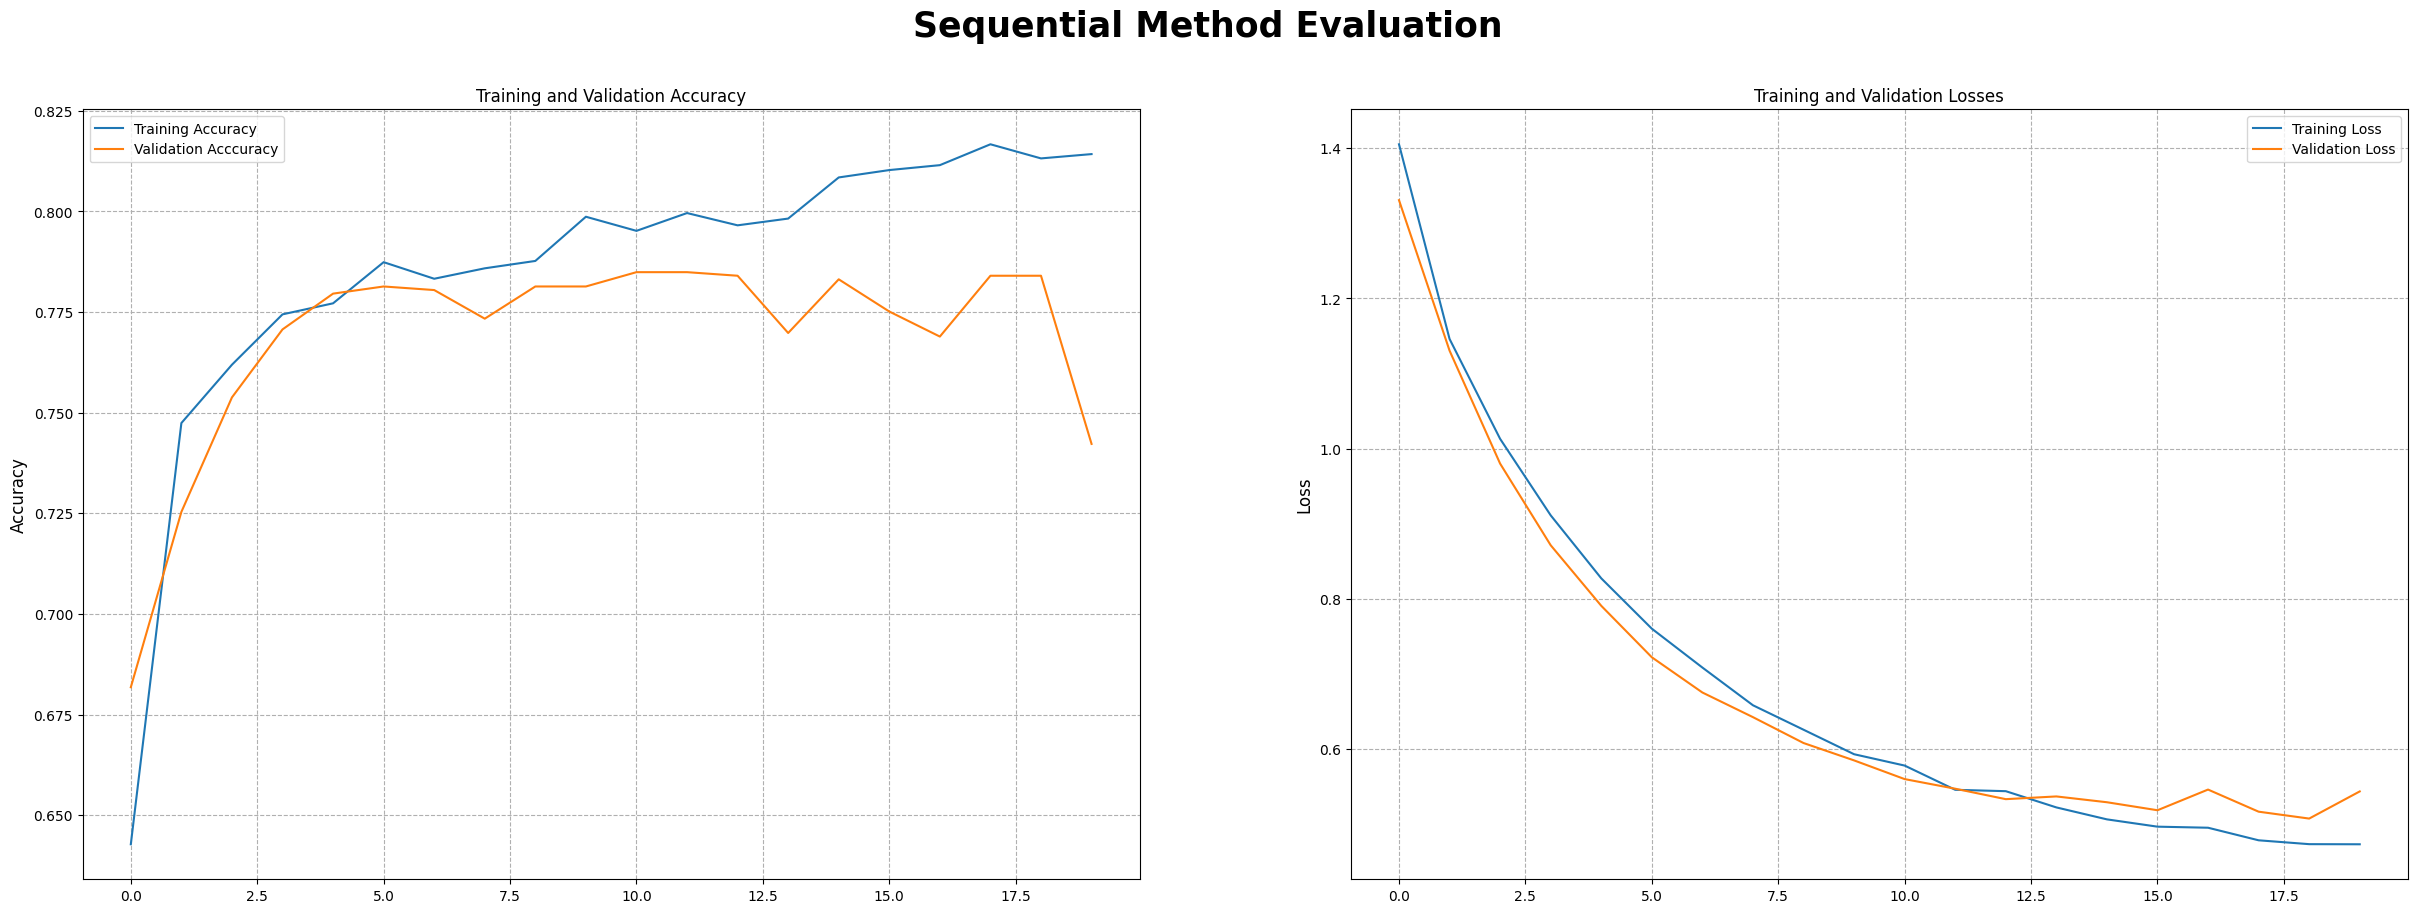

In [77]:
model_eval(history_seq_improved, model_seq_improved)

After being improved, we get a better result in terms of the accuracy and the loss. As can be seen above, there is no more exploding gradient and the graph of train and validation is closer to each other. the best model happens at epoch=6

44/44 [==============================] - 0s 3ms/step
==================== TEST ====================
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1052
           1       0.54      0.66      0.59       353

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.79      0.77      0.78      1405

AUC Score Test: 0.8315659367291763




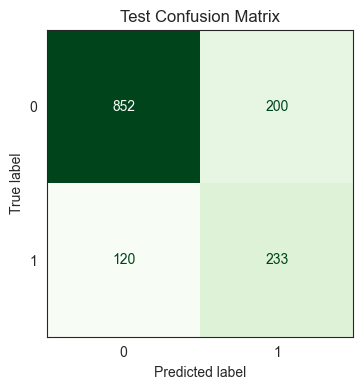

In [117]:
matrix_eval(model_seq_improved)

Interestingly, the recall is decreasing quite a bit although it has been improved. the recall is 0.66 which is somewhat poor. It also can be observed in the confusion matrix, where there are 120 wrong predicted label `1`

### • Functional

Adding activation function, weight initializer, regulizer, batch normalization, dropout and gradient clipping

In [142]:
# Define functional Model's Architecture

inputs = tf.keras.Input(shape=(inp,))
hidden = tf.keras.layers.Dense(inp)(inputs)
hidden = tf.keras.layers.Dense(hid, activation="relu")(hidden)
hidden = tf.keras.layers.BatchNormalization()(hidden)
hidden = tf.keras.layers.Dense(hid)(hidden)
hidden = tf.keras.layers.BatchNormalization()(hidden)
hidden = tf.keras.layers.Dropout(rate=0.1)(hidden)
concat = tf.keras.layers.concatenate([inputs, hidden])
hidden = tf.keras.layers.Dense(hid)(concat)
hidden = tf.keras.layers.BatchNormalization()(hidden)
hidden = tf.keras.layers.Dropout(rate=0.1)(hidden)
hidden = tf.keras.layers.Dense(hid/2)(hidden)
hidden = tf.keras.layers.BatchNormalization()(hidden)
hidden = tf.keras.layers.Dropout(rate=0.1)(hidden)
outputs = tf.keras.layers.Dense(out, activation="sigmoid")(concat)

model_func_improved = tf.keras.Model(inputs=inputs, outputs=outputs)

In [144]:
model_func_improved.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.1), metrics='accuracy')

In [81]:
history_func_improved = model_func_improved.fit(train_dataset, epochs=20, validation_data=val_dataset);

Epoch 1/20
52/52 [==============================] - 1s 6ms/step - loss: 0.5521 - accuracy: 0.7399 - val_loss: 0.5771 - val_accuracy: 0.7147
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7755 - val_loss: 0.5192 - val_accuracy: 0.7476
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7799 - val_loss: 0.4966 - val_accuracy: 0.7520
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7865 - val_loss: 0.4722 - val_accuracy: 0.7716
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7936 - val_loss: 0.4673 - val_accuracy: 0.7707
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.7951 - val_loss: 0.4535 - val_accuracy: 0.7822
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7944 - val_loss: 0.4419 - val_accuracy: 0.7876
Epoch 8/20
52/52 [==

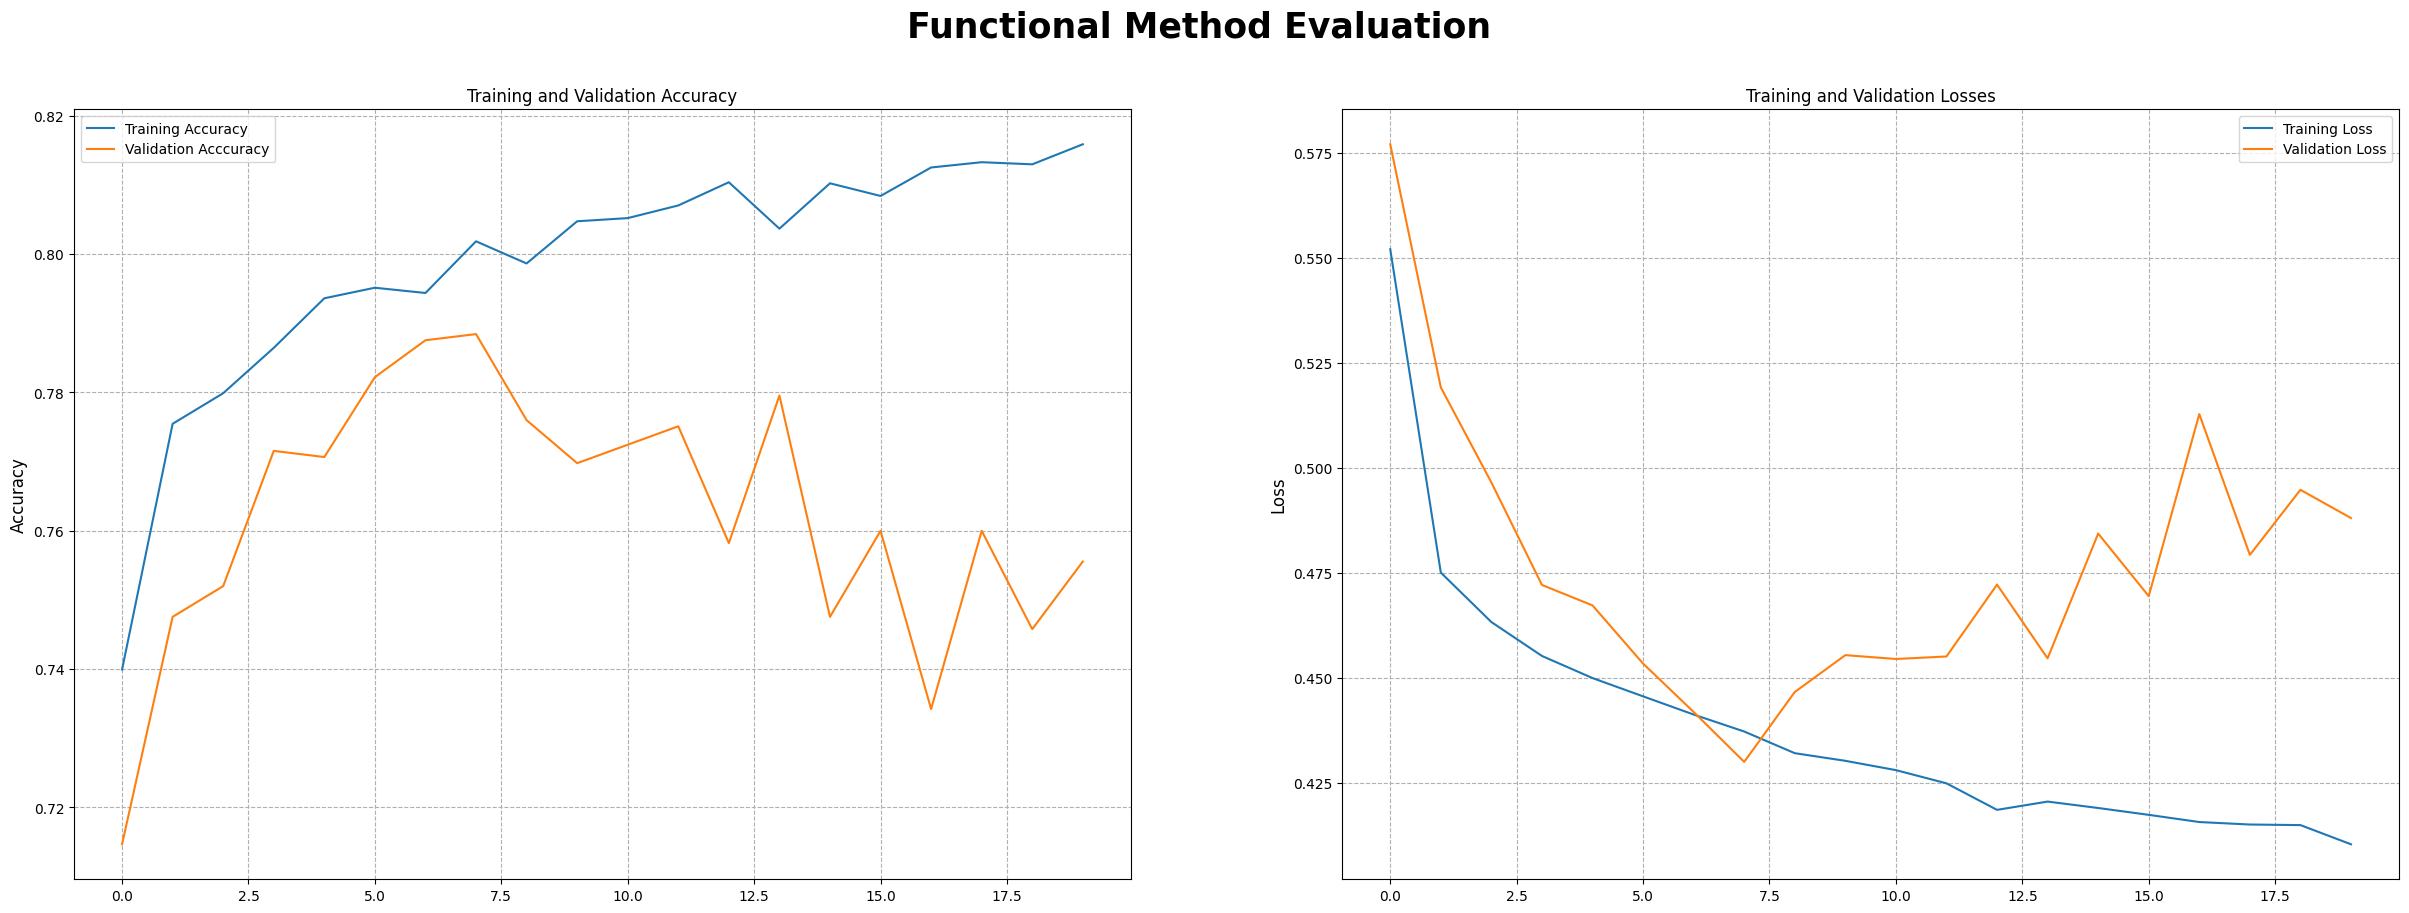

In [82]:
model_eval(history_func_improved, model_func_improved)

Once again, there is an improvement for accuracy and loss after the model is improved. however, the difference between training and validation is still prominent which means it is not fully optimized yet. Probably, the best result happened at epoch=7

44/44 [==============================] - 0s 2ms/step
==================== TEST ====================
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1052
           1       0.51      0.79      0.62       353

    accuracy                           0.76      1405
   macro avg       0.71      0.77      0.72      1405
weighted avg       0.81      0.76      0.77      1405

AUC Score Test: 0.8406488652398239




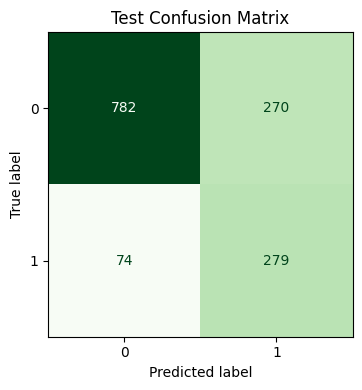

In [83]:
matrix_eval(model_func_improved)

Fascinatingly, the result of the evaluation in terms of recall is the same which is 0.79. That makes this model to be the best model overall, hence we will use this model for our model inference.

## 9. Model Saving

In [148]:
history_func_saving = model_func_improved.fit(train_dataset, epochs=7, validation_data=val_dataset);

Epoch 1/7
52/52 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.7967 - val_loss: 0.4546 - val_accuracy: 0.7538
Epoch 2/7
52/52 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.7958 - val_loss: 0.4426 - val_accuracy: 0.7724
Epoch 3/7
52/52 [==============================] - 0s 7ms/step - loss: 0.4362 - accuracy: 0.8032 - val_loss: 0.4438 - val_accuracy: 0.7689
Epoch 4/7
52/52 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 0.7984 - val_loss: 0.4443 - val_accuracy: 0.7653
Epoch 5/7
52/52 [==============================] - 0s 7ms/step - loss: 0.4309 - accuracy: 0.8013 - val_loss: 0.4536 - val_accuracy: 0.7627
Epoch 6/7
52/52 [==============================] - 0s 6ms/step - loss: 0.4240 - accuracy: 0.8017 - val_loss: 0.4414 - val_accuracy: 0.7671
Epoch 7/7
52/52 [==============================] - 0s 7ms/step - loss: 0.4257 - accuracy: 0.8013 - val_loss: 0.4498 - val_accuracy: 0.7698


In [149]:
# freeze model
model_func_improved.trainable = False

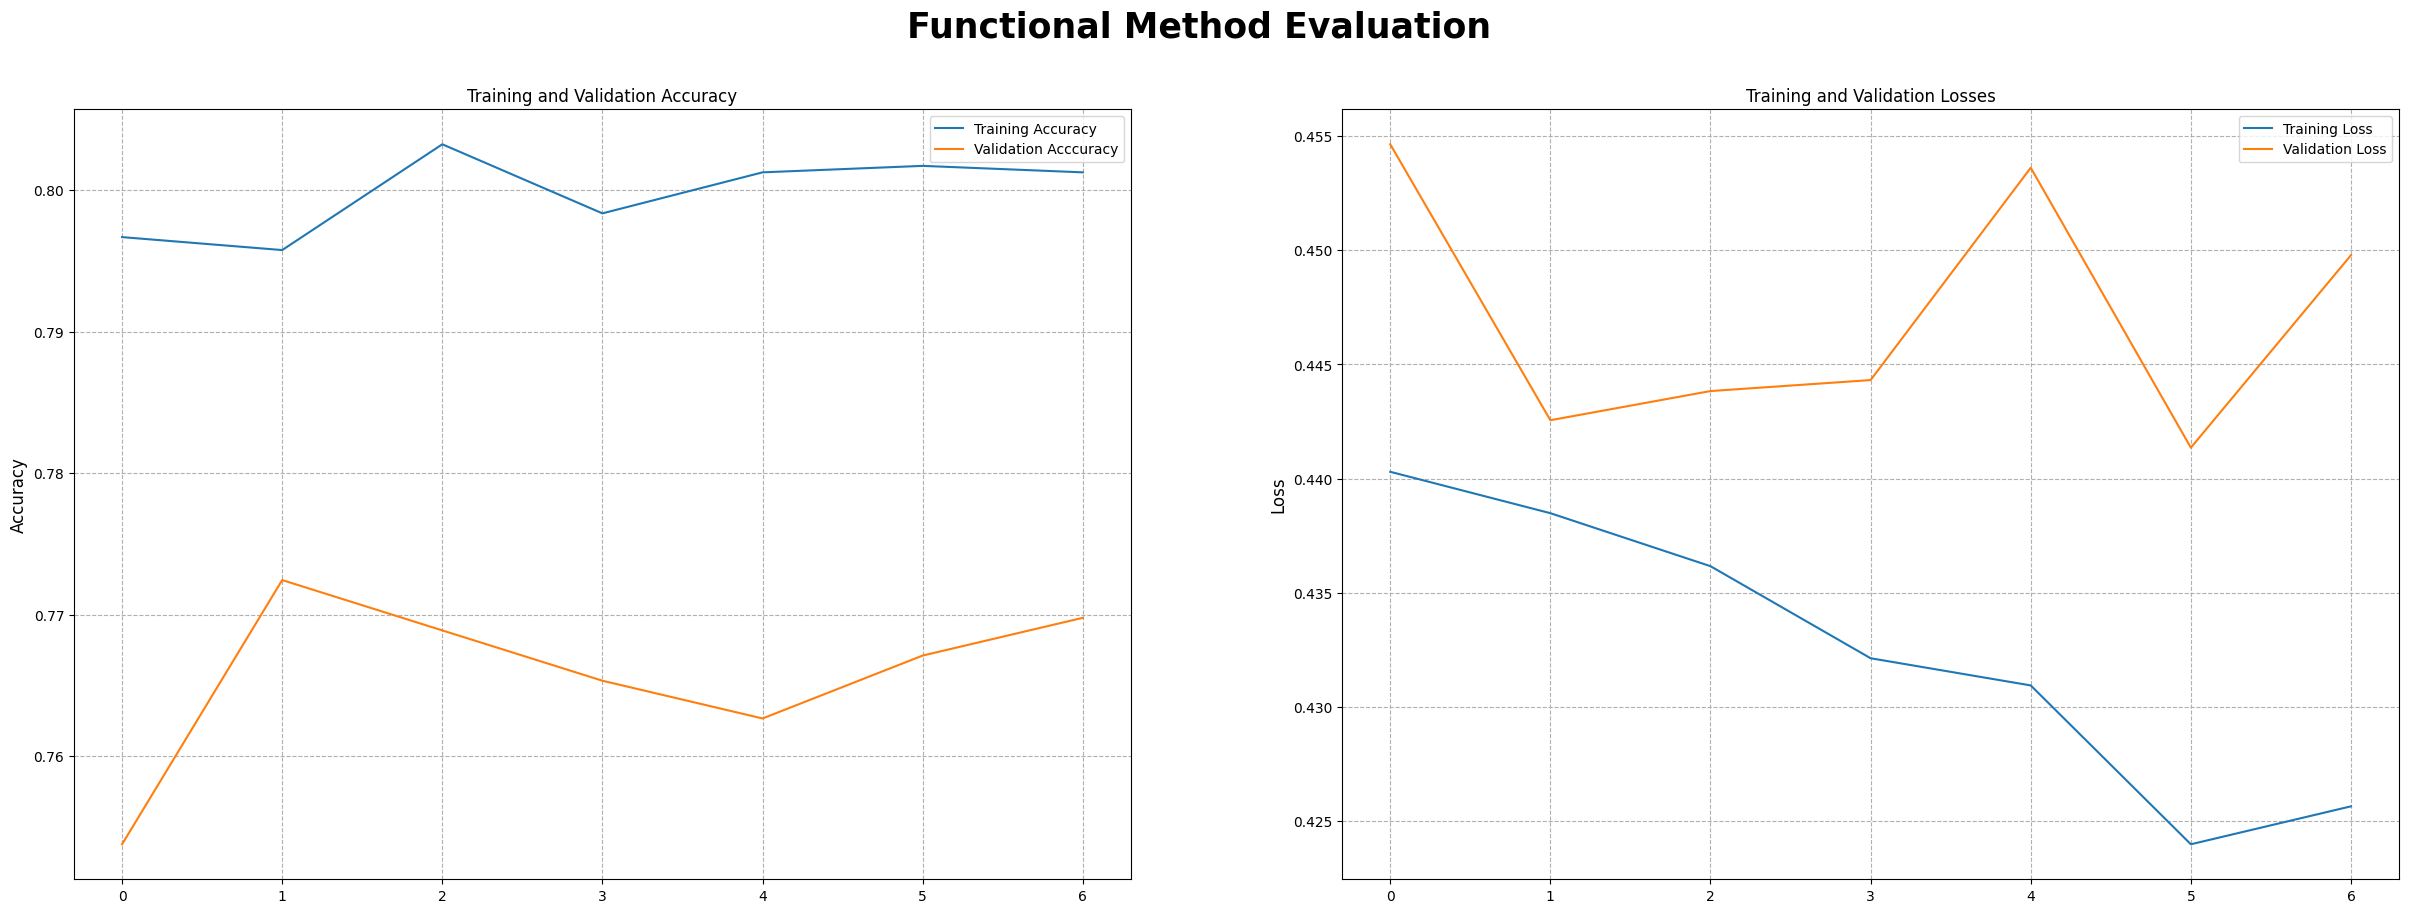

In [150]:
model_eval(history_func_saving, model_func_improved)

Similar to the improvement that we have conducted, the best fit happens at epoch = 7

44/44 [==============================] - 0s 3ms/step
==================== TEST ====================
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1052
           1       0.53      0.74      0.62       353

    accuracy                           0.77      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.81      0.77      0.78      1405

AUC Score Test: 0.8408642919462725




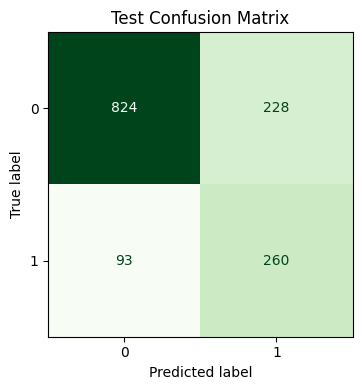

In [151]:
matrix_eval(model_func_improved)

The recall value is 0.74, suprisingly it is decreasing, however it's still not that great.

In [152]:
# Saving model
model_func_improved.save("churn_model.h5")

### • Preprocessing Pipeline

In [94]:
# initiate preprocess pipeline

scaler = MinMaxScaler()

encoder_bin = OrdinalEncoder()

encoder_nom = OneHotEncoder()

preprocess = ColumnTransformer(
    transformers = [
        ('num', scaler, feature_num),
        ('cat_bin', encoder_bin, feature_cat_bin),
        ('cat_ohe', encoder_nom, feature_cat_nom)
    ])

In [95]:
# fit the preprocess pipeline
preprocess.fit(X_train, y_train);

In [112]:
# save the pipeline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

## 10. Model Inference

In [97]:
df_inf

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,StreamingTV,PaymentMethod,OnlineSecurity,Contract,TechSupport,DeviceProtection,MultipleLines,OnlineBackup,StreamingMovies,InternetService,Churn
0,72,99.15,7422.10,0,Yes,No,Yes,No,Electronic check,Yes,Two year,No,Yes,Yes,Yes,Yes,Fiber optic,0
1,66,89.90,5958.85,0,Yes,Yes,No,Yes,Credit card (automatic),Yes,Two year,Yes,Yes,Yes,Yes,Yes,DSL,0
2,45,62.55,2796.45,0,No,No,Yes,No,Credit card (automatic),Yes,One year,Yes,No,No,Yes,No,DSL,0
3,6,109.90,669.45,0,No,No,Yes,Yes,Credit card (automatic),No,Month-to-month,Yes,Yes,Yes,Yes,Yes,Fiber optic,1
4,43,94.30,3953.15,1,Yes,No,Yes,Yes,Electronic check,No,Month-to-month,Yes,No,Yes,Yes,No,Fiber optic,0
5,69,95.65,6744.20,0,Yes,No,Yes,Yes,Credit card (automatic),No,One year,No,No,No,Yes,Yes,Fiber optic,0
6,12,105.30,1275.65,0,No,Yes,Yes,Yes,Electronic check,No,Month-to-month,No,Yes,Yes,Yes,Yes,Fiber optic,0
7,52,63.90,3334.95,0,No,No,No,Yes,Credit card (automatic),Yes,Two year,Yes,Yes,No phone service,Yes,Yes,DSL,0
8,53,104.05,5566.40,0,Yes,Yes,Yes,No,Bank transfer (automatic),Yes,Two year,Yes,Yes,Yes,Yes,Yes,Fiber optic,0
9,60,93.25,5774.55,1,Yes,Yes,Yes,No,Electronic check,Yes,Month-to-month,No,No,Yes,Yes,Yes,Fiber optic,0


In [100]:
# predicting the target using pipeline

df_inf_final = preprocess.transform(df_inf)

In [107]:
# find the probability of each prediction
y_inf_prob = model_seq_improved.predict(df_inf_final)

# predict our target with inference data
y_pred_inf = np.round(y_inf_prob)


1/1 [==============================] - 0s 42ms/step


In [108]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Churn - Prediction'])
y_pred_inf_df

,Churn - Prediction
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [109]:
# Concate between Inference-Set and price's Prediction 

pd.concat([df_inf, y_pred_inf_df], axis=1)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,StreamingTV,PaymentMethod,OnlineSecurity,Contract,TechSupport,DeviceProtection,MultipleLines,OnlineBackup,StreamingMovies,InternetService,Churn,Churn - Prediction
0,72,99.15,7422.10,0,Yes,No,Yes,No,Electronic check,Yes,Two year,No,Yes,Yes,Yes,Yes,Fiber optic,0,0.0
1,66,89.90,5958.85,0,Yes,Yes,No,Yes,Credit card (automatic),Yes,Two year,Yes,Yes,Yes,Yes,Yes,DSL,0,0.0
2,45,62.55,2796.45,0,No,No,Yes,No,Credit card (automatic),Yes,One year,Yes,No,No,Yes,No,DSL,0,0.0
3,6,109.90,669.45,0,No,No,Yes,Yes,Credit card (automatic),No,Month-to-month,Yes,Yes,Yes,Yes,Yes,Fiber optic,1,1.0
4,43,94.30,3953.15,1,Yes,No,Yes,Yes,Electronic check,No,Month-to-month,Yes,No,Yes,Yes,No,Fiber optic,0,1.0
5,69,95.65,6744.20,0,Yes,No,Yes,Yes,Credit card (automatic),No,One year,No,No,No,Yes,Yes,Fiber optic,0,0.0
6,12,105.30,1275.65,0,No,Yes,Yes,Yes,Electronic check,No,Month-to-month,No,Yes,Yes,Yes,Yes,Fiber optic,0,1.0
7,52,63.90,3334.95,0,No,No,No,Yes,Credit card (automatic),Yes,Two year,Yes,Yes,No phone service,Yes,Yes,DSL,0,0.0
8,53,104.05,5566.40,0,Yes,Yes,Yes,No,Bank transfer (automatic),Yes,Two year,Yes,Yes,Yes,Yes,Yes,Fiber optic,0,0.0
9,60,93.25,5774.55,1,Yes,Yes,Yes,No,Electronic check,Yes,Month-to-month,No,No,Yes,Yes,Yes,Fiber optic,0,0.0


We have done model inferential

## 11. Conclusion 

Not to mention our goal in this project which is to create a Artificial Neural to predict the behaviour to retain customers by determining the customer is churn or not. Churn itself means the customer has left within the last month.

Talking about the data that we are dealing with. The data is about the services that each customer has signed up for, customer account information and demographic info about customers. But What is the information that we use in our model? basically we used almost all of the information provided, such as tenure, monthlu charges, total charges, the services they are subscribed to, but we do not use their gender and information about phone service since they are not significantly correlated to our target.

Next is about the model that we have created. since we used artificial neural network, we created 2 model (sequential and functional) and then performed improvement on it. We decided that the most appropiate evaluation matrix for this case is recall since we want to avoid predicting a supposed to be churn customer. hence after creating the model, we came up with the best model that has 0.77 accuracy and 0.74 recall.

In summary, because the model that we created was performing not as good as we expected, we suggest for whoever wants to do similar work to do a better data preprocessing and create a superior neural network architecture.